<a href="https://colab.research.google.com/github/Ifeoluwa96/Data-analysis/blob/master/SCA%20FINAL%20PROJECT_CHURN_DATASET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICT CUSTOMER CHURN IN A BANK 
DATA: https://www.kaggle.com/mathchi/churn-for-bank-customers


## Content of the data

RowNumber—corresponds to the record (row) number and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost

     |████████████████████████████████| 67.3MB 65kB/s 


In [3]:
#load necccessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

import os, sys
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load dataset
churn = pd.read_csv('/content/drive/MyDrive/churn.csv')

data = churn.copy()

In [5]:
#check size of the observation and variable
data.shape

(10000, 14)

In [6]:
#load the first 5 data in the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#load columns in the datasets
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#load information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## observation
We have 14 variables and 10000 observations in the dataset, also;
We have 3 String variables. (Surname, Geography, Gender)
We have 11 numerical variables. (RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited)

In [9]:
#checking for missing data
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## Observation
There is no missing value in this data

## Remove variables that does not have an effect on the problem to be solved ["RowNumber","CustomerId","Surname"]

In [10]:
data.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
#statistics of the data
stats = data.describe()
stats

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# VISUALIZATION

## Analyzing target variable

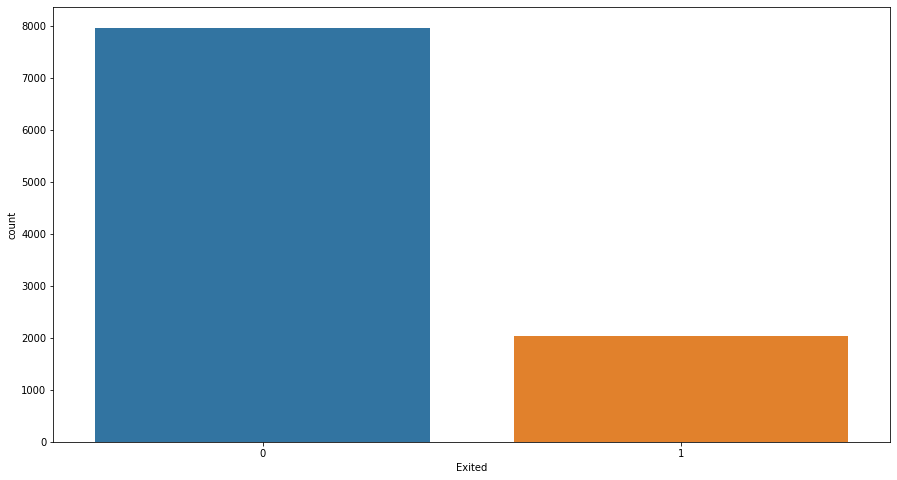

In [13]:
plt.figure(figsize = (15,8))
sns.countplot('Exited', data = data)

In [14]:
## Analyzing how categorical data relates with the target variable (exited)

In [15]:
cat_data = data[['Gender', 'Tenure','Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

Male      5457
Female    4543
Name: Gender, dtype: int64


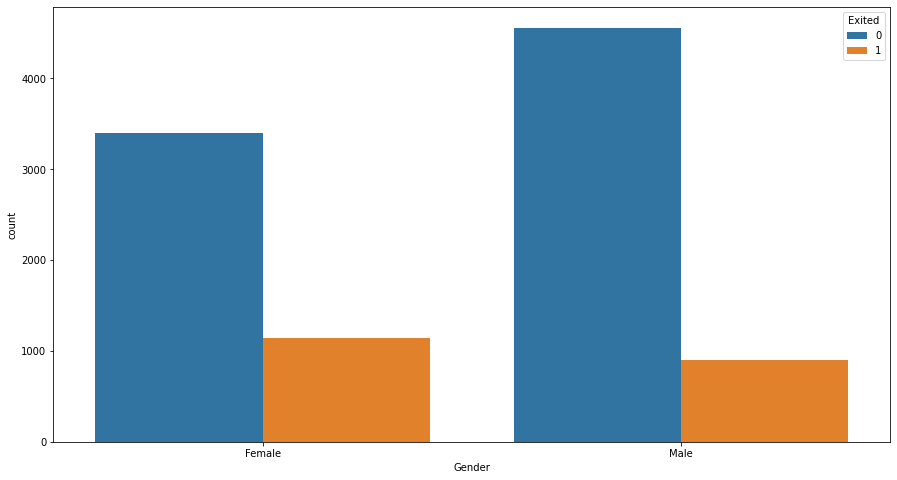

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


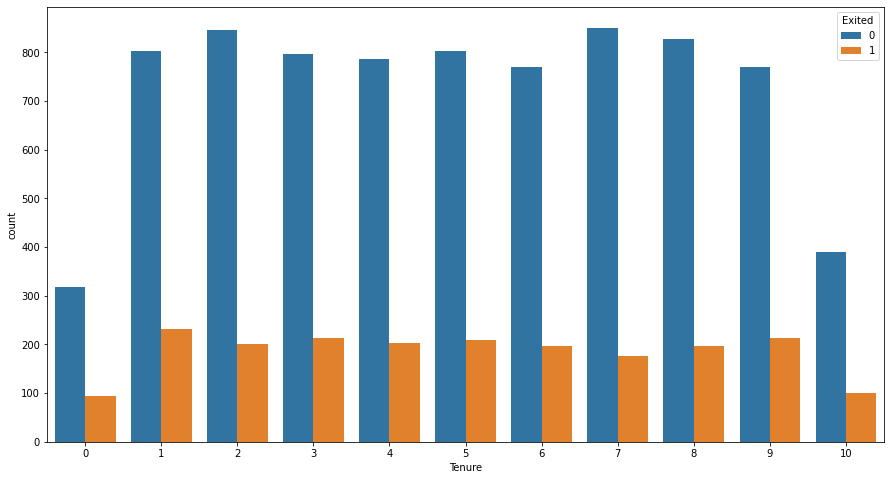

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


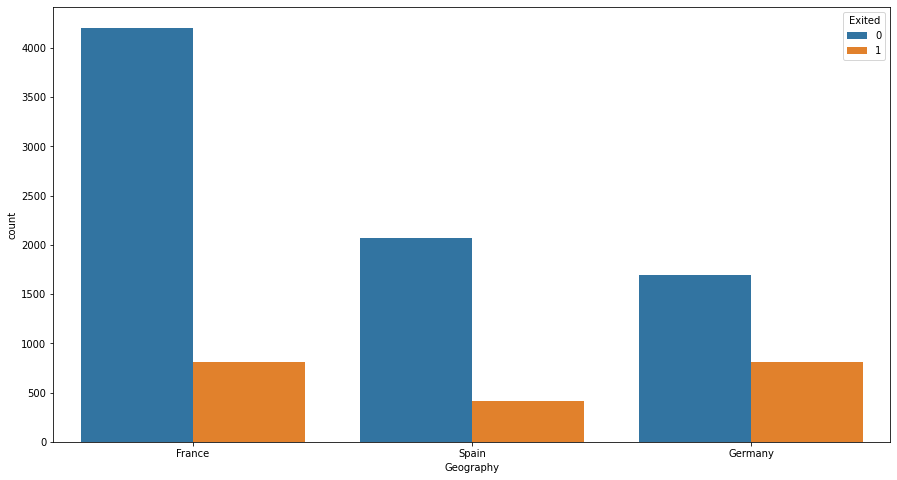

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


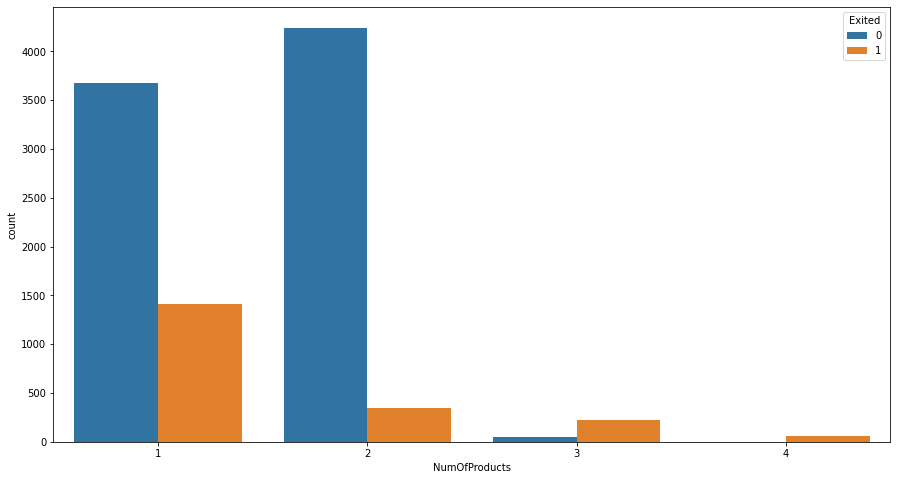

1    7055
0    2945
Name: HasCrCard, dtype: int64


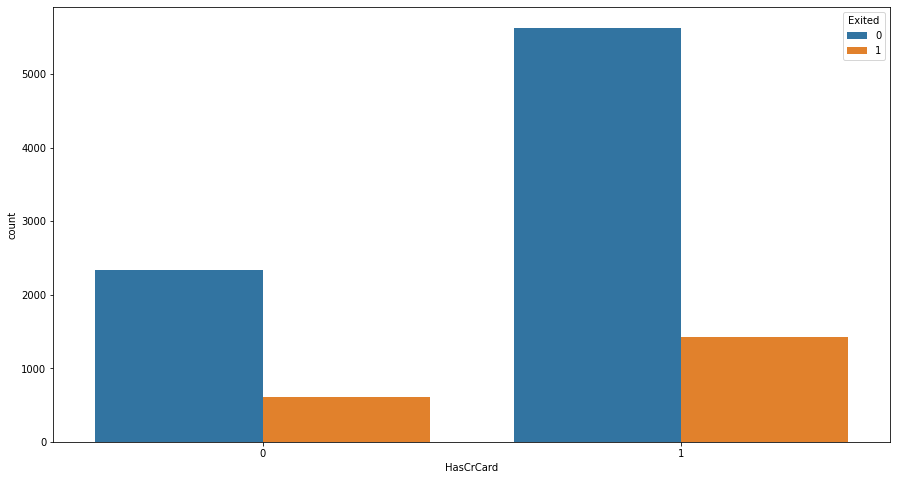

1    5151
0    4849
Name: IsActiveMember, dtype: int64


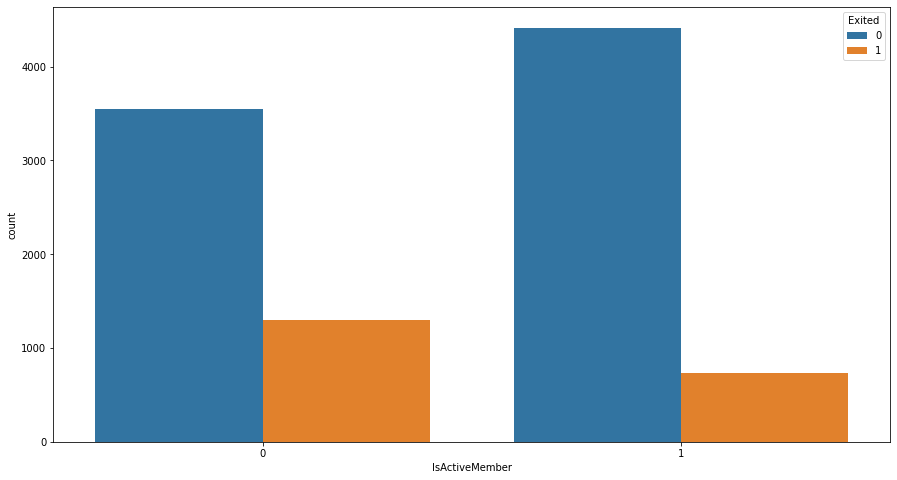

In [16]:
def categorical(var):
    print(data[var].value_counts())
    
    plt.figure(figsize = (15,8))
    sns.countplot(x = var, data = data, hue = 'Exited')
    plt.show()
    
for i in cat_data:
    categorical(i)

## Observation
1. Average loss of customers is highest in Germany.
2. Female customers left the bank more often.
3. We cannot draw an exact conclusion from the Tenure variable. The distributions are close.
4. It is observed that customers who buy more than 2 products have a high rate of loss, but let's not forget that our data is unstable. All of the customers (60 people) who bought 4 products left the bank.
5. Customer churn rate with or without credit cards was close, but the data in our HasCrCard variable was unstable.
6. Customers who do not actively use the bank leave the bank more.

## Analyzing numerical data

In [17]:
Num_data = data[[ 'Age', 'CreditScore', 'Balance', 'EstimatedSalary' ]]

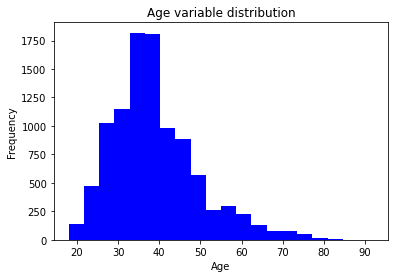

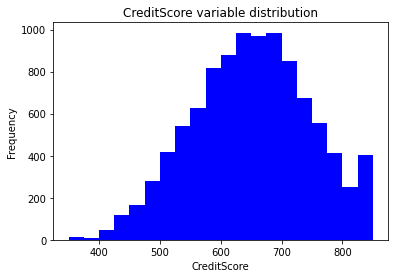

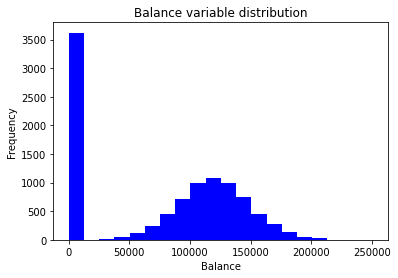

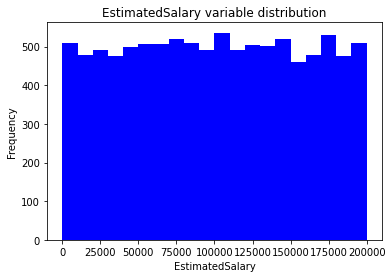

In [18]:
def numerical(var):

    plt.hist(data[var], bins = 20, color = "blue")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(var))
    plt.show()
    
for i in Num_data:
    numerical(i)

#observation
Credit Score variable is skewed to the left.

The age variable is skewed to the right.

Since the ratio of the balance variable is too much, it is added to the left.

EstimatedSalary variable displayed a normal distribution.

## VISUALISING OUTLIERS AND REMOVAL

In [19]:
list_order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

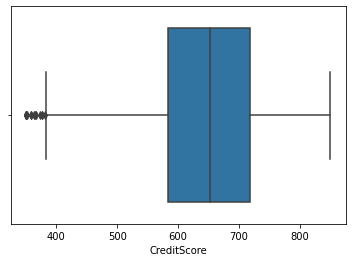

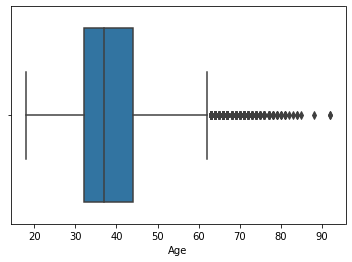

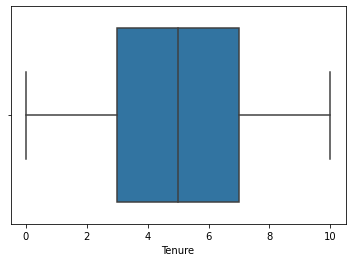

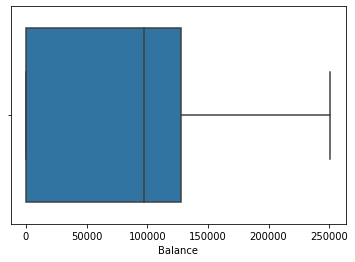

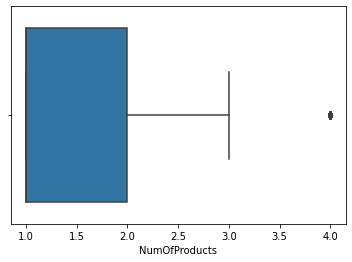

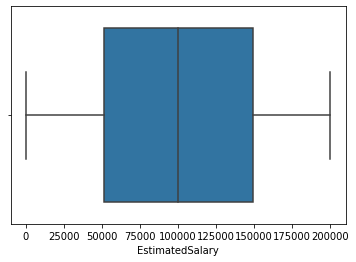

In [20]:
def viz_outliers(var):

    sns.boxplot(data[var])
    plt.show()
    
for i in list_order:
    viz_outliers(i)

## Observation
There is presence of outliers in CreditScore, Age, NumOfProducts, Now lets go further to remove and clean the outliers

In [21]:
# Seems like CreditScore, Age, NumOfProducts have outliers
outliers = ['Age','CreditScore','NumOfProducts']

In [22]:
# create a function to remove the outliers
def outlier_removal(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    point_low = q1 - 1.5 * iqr
    point_high = q3 + 1.5 * iqr
    cleaned_data = data.loc[(data[column] >  point_low) & (data[column] <  point_high)]
    return cleaned_data

In [23]:
# clean the dataset by removing outliers
data_cleaned = outlier_removal(outlier_removal(outlier_removal(data,'Age'),'CreditScore'),'NumOfProducts')

print(data.shape)
print(data_cleaned.shape)

(10000, 11)
(9516, 11)


## CORRELATION MATRIX OF THE DATA

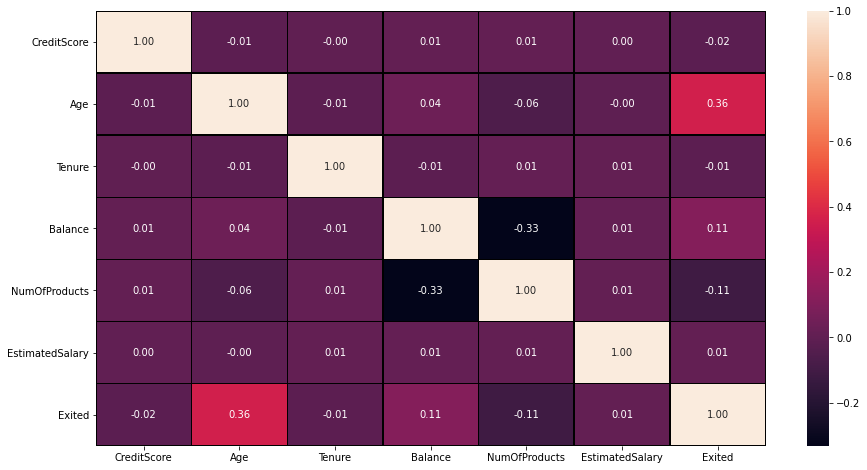

In [25]:
plt.figure(figsize = (15,8))
list_corr = ['CreditScore' ,'Age' ,'Tenure' ,'Balance' ,'NumOfProducts' ,'EstimatedSalary' ,'Exited']
sns.heatmap(data_cleaned[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

## Observation
1. Age has the strongest relation with Exited (0.35). Here we can make the following comment: As the age of the customer increases, the rate of losing the customer increases. (Positive strong relationship)
2. Exited and Balance variable have a relatively strong relationship (0.12).
3. Exited and the variable NumOfProducts have a moderately strong relationship (-0.11). They have a strong negative relationship.

## Analyzing how numerical variable relates with the target variable (exited)

# AGE AND EXIT

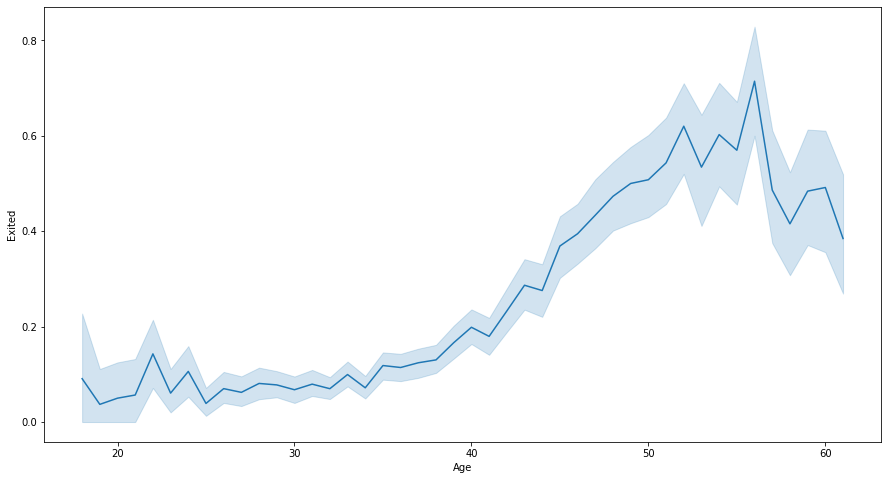

In [26]:
plt.figure(figsize = (15,8))
sns.lineplot(x = "Age", y = "Exited", data = data_cleaned)

In [27]:
data_cleaned.groupby(data_cleaned["Exited"])["Age"].mean()

Exited
0    36.089197
1    43.793583
Name: Age, dtype: float64

## Observation
Yes, as we said while analyzing the correlation matrix, as the age of the customer increases, the customer losing rate increases.

Average age of customers who did not leave the bank ==> 36

Average age of customers leaving the bank ==> 43

# FEATURE ENGINEERING

In [28]:
# since geography is a categorical data lets one-hot encode it by using pd.get_dummies
data_cleaned = pd.get_dummies(data_cleaned, columns = ['Geography'])

# since gender is a categorical data lets label encode it as female = 1 and male = 0
def func(data_cleaned):
    d =[]
    for m in data_cleaned:
        if m =='Female':
            d.append(1)
        else:
            d.append(0)
    return d

data_cleaned['Gender'] = func(data_cleaned['Gender'])

In [29]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9516 non-null   int64  
 1   Gender             9516 non-null   int64  
 2   Age                9516 non-null   int64  
 3   Tenure             9516 non-null   int64  
 4   Balance            9516 non-null   float64
 5   NumOfProducts      9516 non-null   int64  
 6   HasCrCard          9516 non-null   int64  
 7   IsActiveMember     9516 non-null   int64  
 8   EstimatedSalary    9516 non-null   float64
 9   Exited             9516 non-null   int64  
 10  Geography_France   9516 non-null   uint8  
 11  Geography_Germany  9516 non-null   uint8  
 12  Geography_Spain    9516 non-null   uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 845.7 KB


# MODELLING

In [30]:
x = data_cleaned.drop('Exited', axis = 1) 
y = data_cleaned['Exited']

In [31]:
#splitting data into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42
                                                   )

# LogisticRegression

In [32]:
Lr = LogisticRegression() # algorithm instantiation
Lr.fit(x_train, y_train) # model learning

# make your predictions on the test data
pred = Lr.predict(x_test)

print(classification_report(y_test, pred, digits=2))

# evaluate the test data using accuracy score
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2277
           1       0.50      0.09      0.16       578

    accuracy                           0.80      2855
   macro avg       0.66      0.54      0.52      2855
weighted avg       0.75      0.80      0.74      2855

Accuracy score of Logistic Regression model:  0.7978984238178634


In [33]:
#Perform feature scaling (standardization) using standardscalar()
sc = StandardScaler()
xstandard_train = sc.fit_transform(x_train)
xstandard_test = sc.transform (x_test)

In [34]:
Lr_s = LogisticRegression() # algorithm instantiation
Lr_s.fit(xstandard_train, y_train)

pred = Lr_s.predict(xstandard_test)

print(classification_report(y_test, pred, digits=2))
Lr_score = accuracy_score(y_test, pred)
print("Accuracy score of Standardised Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2277
           1       0.70      0.27      0.39       578

    accuracy                           0.83      2855
   macro avg       0.77      0.62      0.64      2855
weighted avg       0.81      0.83      0.80      2855

Accuracy score of Standardised Logistic Regression model:  0.8287215411558669


# SVC


In [35]:
svc = SVC(probability = True) # algorithm instantiation
svc.fit(xstandard_train, y_train)

pred = svc.predict(xstandard_test)

print(classification_report(y_test, pred, digits=2))
svc_score = accuracy_score(y_test, pred)
print("Accuracy score of SVC model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2277
           1       0.81      0.35      0.49       578

    accuracy                           0.85      2855
   macro avg       0.83      0.66      0.70      2855
weighted avg       0.85      0.85      0.83      2855

Accuracy score of SVC model:  0.8518388791593695


#KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5) # algorithm instantiation
knn.fit(xstandard_train, y_train)

pred = knn.predict(xstandard_test)

print(classification_report(y_test, pred, digits=2))
knn_score = accuracy_score(y_test, pred)
print("Accuracy score of KNN model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      2277
           1       0.60      0.33      0.42       578

    accuracy                           0.82      2855
   macro avg       0.73      0.64      0.66      2855
weighted avg       0.80      0.82      0.80      2855

Accuracy score of KNN model:  0.8203152364273205


# RandomForestClassifier

In [37]:
rand = RandomForestClassifier(random_state = 42)

rand.fit(x_train, y_train)
pred = rand.predict(x_test)

print(classification_report(y_test, pred, digits=2))
rand_score = accuracy_score(y_test, pred)
print("Accuracy score of Random Forest model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.77      0.45      0.57       578

    accuracy                           0.86      2855
   macro avg       0.82      0.71      0.74      2855
weighted avg       0.85      0.86      0.85      2855

Accuracy score of Random Forest model:  0.8619964973730297


In [38]:
rand = RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators = 1000)

rand.fit(x, y)

scoreRand = cross_val_score(rand, x, y, cv=5, scoring='accuracy')
print ('The mean value of cross val score is {}'.format(scoreRand.mean()))


The mean value of cross val score is 0.8645439310774231


# XGBClassifier

In [39]:
xgb =XGBClassifier(learning_rate=0.01,n_estimators=200, 
                            max_depth=5, eval_metric="logloss")

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

print(classification_report(y_test, pred, digits=2))
xgb_score = accuracy_score(y_test, pred)
print("Accuracy score of XGB model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.80      0.42      0.55       578

    accuracy                           0.86      2855
   macro avg       0.84      0.70      0.73      2855
weighted avg       0.86      0.86      0.84      2855

Accuracy score of XGB model:  0.861646234676007


In [40]:
xgb =XGBClassifier()
xgb.fit(x, y)

scoreXGB = cross_val_score(xgb, x, y, cv=10, scoring='accuracy')
print ('The mean value of cross val score is {}'.format(scoreXGB.mean()))

The mean value of cross val score is 0.8634919898558792


# GradientBoostingClassifier

In [41]:
model_grb = GradientBoostingClassifier()

model_grb.fit(x_train,y_train)

pred = model_grb.predict(x_test)

print(classification_report(y_test, pred, digits=2))
grb_score = accuracy_score(y_test, pred)
print("Accuracy score of Gradient Boost model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.78      0.44      0.56       578

    accuracy                           0.86      2855
   macro avg       0.83      0.70      0.74      2855
weighted avg       0.85      0.86      0.85      2855

Accuracy score of Gradient Boost model:  0.8612959719789842


In [42]:
model_grb = GradientBoostingClassifier()
model_grb.fit(x, y)

scoreGRB = cross_val_score(model_grb, x, y, cv=10, scoring='accuracy')
print ('The mean value of cross val score is {}'.format(scoreGRB.mean()))

The mean value of cross val score is 0.8620208493492034


# LGBM_Model

In [43]:
lgbm_model = LGBMClassifier(silent = 0, learning_rate = 0.09, max_delta_step = 2, n_estimators = 100, boosting_type = 'gbdt',
                            max_depth = 10, eval_metric = "logloss", gamma = 3, base_score = 0.5)

lgbm_model.fit(x_train, y_train)
y_pred = lgbm_model.predict(x_test)
print(classification_report(y_test, y_pred, digits=2))
lgbm_score = accuracy_score(y_test, y_pred)
print("Accuracy score of tuned LightGBM model: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2277
           1       0.76      0.47      0.58       578

    accuracy                           0.86      2855
   macro avg       0.82      0.72      0.75      2855
weighted avg       0.85      0.86      0.85      2855

Accuracy score of tuned LightGBM model:  0.8626970227670753


# CatBoostClassifier

In [44]:
#Instantiate CatBoostClassifier
catboost = CatBoostClassifier()

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = catboost, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(x_train,y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

Streaming output truncated to the last 5000 lines.
125:	learn: 0.3014953	total: 351ms	remaining: 206ms
126:	learn: 0.3012214	total: 354ms	remaining: 204ms
127:	learn: 0.3009504	total: 357ms	remaining: 201ms
128:	learn: 0.3006483	total: 361ms	remaining: 199ms
129:	learn: 0.3002573	total: 365ms	remaining: 197ms
130:	learn: 0.2999775	total: 369ms	remaining: 194ms
131:	learn: 0.2995836	total: 373ms	remaining: 192ms
132:	learn: 0.2992740	total: 376ms	remaining: 190ms
133:	learn: 0.2991379	total: 379ms	remaining: 187ms
134:	learn: 0.2988167	total: 382ms	remaining: 184ms
135:	learn: 0.2985563	total: 385ms	remaining: 181ms
136:	learn: 0.2983050	total: 387ms	remaining: 178ms
137:	learn: 0.2978441	total: 390ms	remaining: 175ms
138:	learn: 0.2975289	total: 393ms	remaining: 172ms
139:	learn: 0.2973213	total: 396ms	remaining: 170ms
140:	learn: 0.2969919	total: 398ms	remaining: 167ms
141:	learn: 0.2966606	total: 401ms	remaining: 164ms
142:	learn: 0.2964189	total: 404ms	remaining: 161ms
143:	learn: 0

In [45]:
cat = CatBoostClassifier(max_depth = 4, n_estimators = 200 , verbose=0)

cat.fit(x_train, y_train)
pred = cat.predict(x_test)

print(classification_report(y_test, pred, digits=2))
cat_score = accuracy_score(y_test, pred)
print("Accuracy score of CatBoost model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2277
           1       0.76      0.46      0.58       578

    accuracy                           0.86      2855
   macro avg       0.82      0.71      0.75      2855
weighted avg       0.85      0.86      0.85      2855

Accuracy score of CatBoost model:  0.8619964973730297


In [46]:
cat = CatBoostClassifier(max_depth=4, n_estimators=1000, verbose=0)

cat_tuned = cat.fit(x, y)
scoreCat = cross_val_score(cat, x, y, cv=5, scoring='accuracy')
print ('The mean value of cross val score is {}'.format(scoreCat.mean()))

The mean value of cross val score is 0.8649638231540646


# EMSEMBLE

In [47]:
model = VotingClassifier(estimators=[('catboost', cat), ('LGBM', lgbm_model), ('GradientBoost', model_grb), ('randomforest', rand)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8609457092819615

In [48]:
model_data =[['LightGBM Classifier', lgbm_score],
             ['Random Forest Classifier', rand_score],
             ['Catboost Classifier', cat_score], 
             ['XGB Classifier', xgb_score],
             ['Gradient Boost Classifier', grb_score],
             ['SVM Classifier', svc_score],
             ['Logistic Regression', Lr_score],
             ['KNN Classifier', knn_score]] 

indexes = [1,2,3,4,5,6,7,8]
columns_name = ['MODEL', 'ACCURACY_SCORE']
ife = pd.DataFrame(data = model_data,index = indexes, columns = columns_name )
print(ife)

                       MODEL  ACCURACY_SCORE
1        LightGBM Classifier        0.862697
2   Random Forest Classifier        0.861996
3        Catboost Classifier        0.861996
4             XGB Classifier        0.861646
5  Gradient Boost Classifier        0.861296
6             SVM Classifier        0.851839
7        Logistic Regression        0.828722
8             KNN Classifier        0.820315


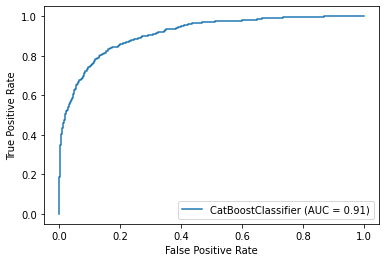

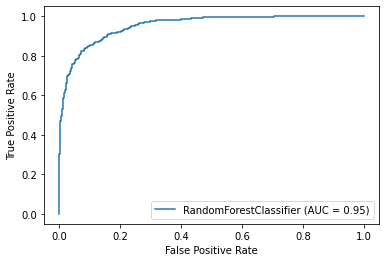

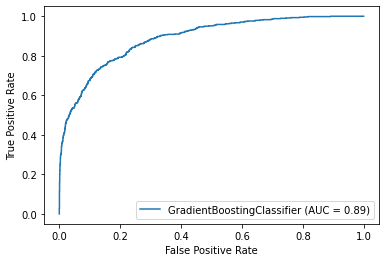

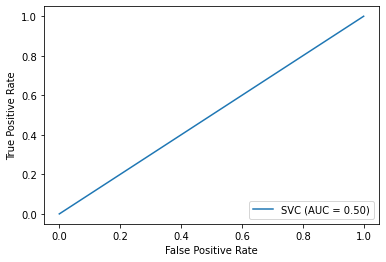

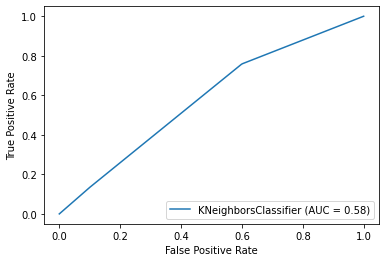

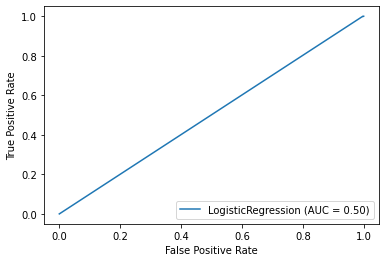

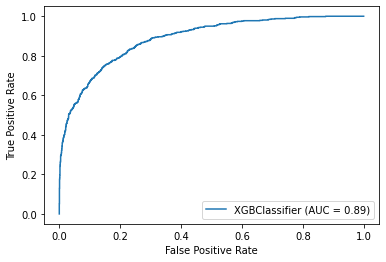

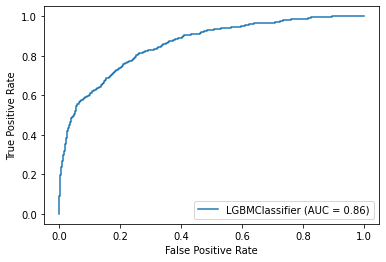

In [50]:
# Evaluate model using Area under Curve to evaluate best performed model

plot_roc_curve(cat, x_test, y_test) 
plot_roc_curve(rand, x_test, y_test) 
plot_roc_curve(model_grb, x_test, y_test)
plot_roc_curve(svc, x_test, y_test) 
plot_roc_curve(knn, x_test, y_test) 
plot_roc_curve(Lr_s, x_test, y_test)
plot_roc_curve(xgb, x_test, y_test) 
plot_roc_curve(lgbm_model, x_test, y_test) 
plt.show()


Summary:
The best model amonst the ones implemented is Random Forests with an accuracy of 86.2% as for the other models, even though their accuracy hovers arround 80%, their AUC is pretty bad and thus shouldn't be used for a real world scenario.

When the success of the models was examined, CatBoost algorithm achieved low success compared to Gradient Boost and Random Forest algorithms.
We obtained the best success score from the Random Forest algorithm.

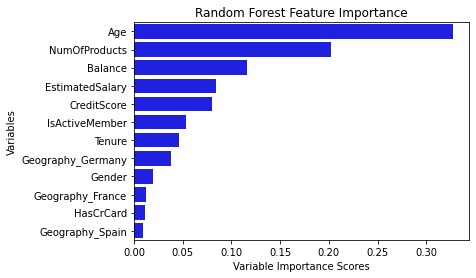

In [51]:
#feature importance of random forest model i.e the most importance predictive feature (variables) in the model performance
feature_index = data_cleaned.loc[:, x.columns ]

feature_importance = pd.Series(rand.feature_importances_, 
                               index=feature_index.columns).sort_values(ascending=False)
                               
sns.barplot(x = feature_importance, y = feature_importance.index, color='b')
plt.xlabel('Variable Importance Scores')
plt.ylabel('Variables')
plt.title('Random Forest Feature Importance')
plt.show()

# DEPLOYMENT STAGE

In [52]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(rand, pickle_out) 
pickle_out.close()

In [53]:
# installing packages
#We have installed 3 libraries here. pyngrok is a python wrapper for ngrok which helps to open secure tunnels from public URLs to localhost. 
#This will help us to host our web app. Streamlit will be used to make our web app.

In [54]:
!pip install -q pyngrok

     |████████████████████████████████| 747kB 4.0MB/s 


In [55]:
!pip install -q streamlit

     |████████████████████████████████| 8.2MB 4.7MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 174kB 50.0MB/s 
     |████████████████████████████████| 112kB 46.4MB/s 
     |████████████████████████████████| 4.2MB 37.3MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 122kB 58.2MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [56]:
!pip install -q streamlit_ace

     |████████████████████████████████| 3.9MB 4.2MB/s 


In [57]:
data_cleaned.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [58]:
#CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited

In [59]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_France, Geography_Germany, Geography_Spain):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if HasCrCard == "No":
        HasCrCard = 0
    else:
        HasCrCard = 1
 
    if IsActiveMember == "No":
        IsActiveMember = 0
    else:
        IsActiveMember = 1  

    if Geography_France == "Yes":
        Geography_France = 1
    else:
        Geography_France = 0

    if Geography_Spain == "Yes":
        Geography_Spain = 1
    else:
        Geography_Spain = 0
    
    if Geography_Germany == "Yes":
        Geography_Germany = 1
    else:
        Geography_Germany = 0

 
    # Making predictions 
    prediction = classifier.predict( 
        [[CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_France, Geography_Germany, Geography_Spain]])
     
    if prediction == 0:
        pred = 'Stay!'
    else:
        pred = 'Leave!'
    return pred


# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:blue;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Bank Customer Churn Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox("Customer's Gender",("Male","Female"))
    Age = st.number_input("Customer's Age")
    NumOfProducts = st.selectbox("Total Number of Bank Product The Customer Uses", ("1","2","3","4"))
    Tenure = st.selectbox("Number of Years The Customer Has Been a Client", ("0","1","2","3","4","5","6","7","8","9","10"))
    HasCrCard = st.selectbox('Does The Customer has a Credit Card?',("Yes","No"))
    IsActiveMember = st.selectbox('Is The Customer an Active Member?',("Yes","No"))
    EstimatedSalary = st.number_input("Estimated Salary of Customer") 
    Balance = st.number_input("Customer's Account Balance")
    CreditScore = st.number_input("Customer's Credit Score")
    Geography_France = st.selectbox('Is the Customer From France?',("Yes","No"))
    Geography_Spain = st.selectbox('Is the Customer From Spain?',("Yes","No"))
    Geography_Germany = st.selectbox('Is the Customer From Germany?',("Yes","No"))

    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_France, Geography_Germany, Geography_Spain) 
        st.success('The Customer will {}'.format(result))
        #print(LoanAmount)
     
if __name__=='__main__': 
    main()

Writing app.py


In [60]:
!streamlit run app.py &>/dev/null&

In [61]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://b64eb42a8fc3.ngrok.io" -> "http://localhost:8501">